In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary library

In [0]:
path = "/content/drive/My Drive/AVR_data"
import os

In [0]:
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


Getting the haar features

In [0]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/My\ Drive
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml -P drive/My\ Drive  
!wget https://raw.githubusercontent.com/opencv/opencv_contrib/master/modules/face/data/cascades/haarcascade_mcs_nose.xml -P drive/My\ Drive

--2020-03-25 11:47:53--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘drive/My Drive/haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.02s   

2020-03-25 11:47:54 (14.7 MB/s) - ‘drive/My Drive/haarcascade_eye.xml.1’ saved [341406/341406]

--2020-03-25 11:47:58--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected

Reading the dataset image by image and providing a label to that set

In [0]:
images = []
label = []
filenames = os.listdir("/content/drive/My Drive/AVR_data")
for filename in filenames:
  sub_filenames = os.listdir("/content/drive/My Drive/AVR_data/"+filename)
  for sub_file in sub_filenames:
    image = cv2.imread("/content/drive/My Drive/AVR_data/"+filename + "/" +sub_file)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    images.append(image)
    label.append(filename)

Creating instances of the haar cascade features

In [0]:
cascades_path = 'drive/My Drive/'
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye_tree_eyeglasses.xml')
nose_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_mcs_nose.xml')

Function to get the face from the image. It does two tasks, creates a red box around the detected face and crop the background of image into that region of interest where the face is present

In [0]:
def face_detect(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces_box = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces_box:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),6)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
  return img,roi_gray,roi_color

In [0]:
img = images[3]

This is an example image

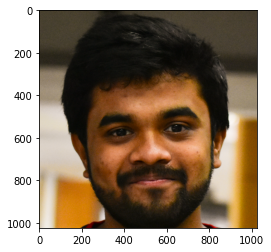

In [0]:
plt.imshow(img)
plt.show()

This is the face detected in the example image

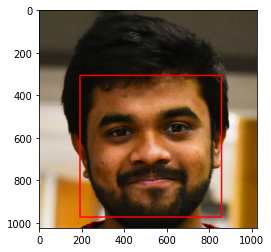

In [0]:
img, roi_gray, roi_color = face_detect(img)
plt.imshow(img)
plt.show()

This function uses the region of interest of face and the finds the eyes 

In [0]:
def eyes_detect(img, roi_gray, roi_color):
  eyes_box = eye_cascade.detectMultiScale(roi_gray)
  count = 0
  for (ex,ey,ew,eh) in eyes_box:
    cv2.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0,255,0),6)
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0),6)
    if (count == 2):
      break
  return roi_gray, roi_color

These are the detected eyes from the image

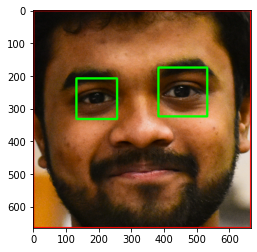

In [0]:
roi_gray , roi_color = eyes_detect(img, roi_gray, roi_color)
plt.imshow(roi_color)
plt.show()

This function finds the centre of the eye. Uses the rectangular box around the eyes and the finds the centre of that box

In [0]:
def eyes_detect_centre(img, roi_gray, roi_color):
  eyes_box = eye_cascade.detectMultiScale(roi_gray)
  count = 0
  for (ex,ey,ew,eh) in eyes_box:
    x = int((2*ex + ew)/2)
    y = int((2*ey + eh)/2)
    cv2.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0,255,0),6)
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0),6)
    cv2.circle(roi_color , (x , y ), 6 , (0,255,0), 7)
    count = count +1 
    if(count == 2):
      break
  return roi_gray , roi_color

This is another example image

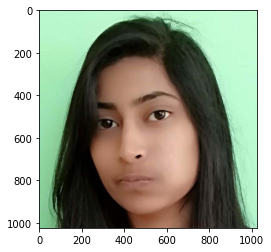

In [0]:
img = images[65]
plt.imshow(img)
plt.show()

Eye centre detected are as shown below

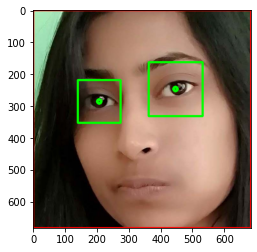

In [0]:
img, roi_gray, roi_color = face_detect(img)
roi_gray , roi_color = eyes_detect_centre(img , roi_gray , roi_color)
plt.imshow(roi_color)
plt.show()

This function detects the nose and also finds the centre using the same method as above

In [0]:
def nose_detect_centre(img , roi_gray , roi_color):
  nose_box = nose_cascade.detectMultiScale(roi_gray,1.3,5)
  for (nx,ny, ew, eh) in nose_box:
    cv2.rectangle(roi_color, (nx, ny) , (nx+ew , ny+eh) , (255 , 0, 0), 4)
    x = int((2*nx+ew)/2)
    y = int((2*ny+eh)/2)
    cv2.circle(roi_color, (x,y) , 6 , (0 , 255 , 0) , 6)
  return roi_gray , roi_color

Image showing the centre of nose detected from that function

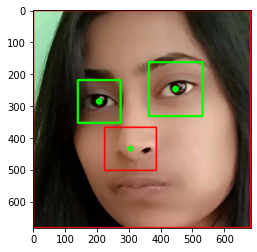

In [0]:
roi_gray , roi_color = nose_detect_centre(img , roi_gray, roi_color)
plt.imshow(roi_color)
plt.show()

This is the most important function. This masks the area around the face, while keeping only the face and blacking the other regions

In [0]:
def oval_mask(img , roi_gray , roi_color):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x , y, w, h) in faces:
    mask = np.zeros_like(roi_color)
    img_mask = np.zeros_like(img)
    rows, cols,_ = mask.shape
    img_mask = cv2.ellipse(img_mask,(int(rows/2)+x, int(cols/2)+y), (int((2*x+w)/3),int((2*y+h)/3.2)), angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)    
    img = np.bitwise_and(img_mask, img)
  return img,img_mask

This is the final output of the oval face detection

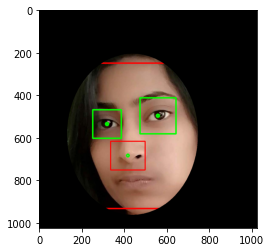

In [0]:
final_image, mask = oval_mask(img , roi_gray , roi_color)
plt.imshow(final_image)
plt.show()